<a href="https://colab.research.google.com/github/Akash-awan83/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Linear Regression ***
Estimated time needed: 45 minutes

If you are consulting an automobile company, you are trying to understand the factors that influence the sale price of the cars. Specifically, which factors drive the car prices up? And how accurately can you predict the sale price based on the car's features?

In this notebook, we will perform a simple linear regression analysis on a car price dataset, show how this prediction analysis is done and what are the important assumptions that must be satisfied for linear regression. We will also look at different ways to transform our data.

# **Objectives**
After completing this lab you will be able to:

Select the significant features based on the visual analysis
Check the assumptions for Linear Regression model
Apply the Linear Regression model and make the predictions
Apply the pipelines to transform the data



In [ ]:
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


In [ ]:
import sklearn; print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 1.6.1


In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv


--2025-07-05 08:27:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26511 (26K) [text/csv]
Saving to: ‘CarPrice_Assignment.csv.1’

CarPrice_Assignment 100%[===================>]  25.89K  --.-KB/s    in 0.03s   

2025-07-05 08:27:54 (920 KB/s) - ‘CarPrice_Assignment.csv.1’ saved [26511/26511]



In [ ]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# **Data Cleaning and Wrangling**
Here we will check we have any missing value or not

In [ ]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


Also, check for any duplicates by running duplicated() function through 'car_ID' records, since each row has a unique car ID value

In [ ]:
#we don't have any empty or null feature
sum(df.duplicated(subset='car_ID'))==0

True

Next, let's look into some of our object variables first. Using unique() function, we will describe all categories of the 'CarName' attribut

In [ ]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see that the 'CarName' includes both the company name (brand) and the car model. Next, we want to split a company name from the model of a car, as for our model building purpose, we will focus on a company name only.

In [ ]:
df['brand'] = df['CarName'].str.split(' ').str[0].str.lower()

df['brand']

,brand
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [ ]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df['brand']=df['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
df['brand']=df['brand'].replace(['maxda'], 'mazda')
df['brand']=df['brand'].replace(['porcshce'], 'porsche')
df['brand']=df['brand'].replace(['toyouta'], 'toyota')
df['brand'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Let's plot and sort the total number of Brands.

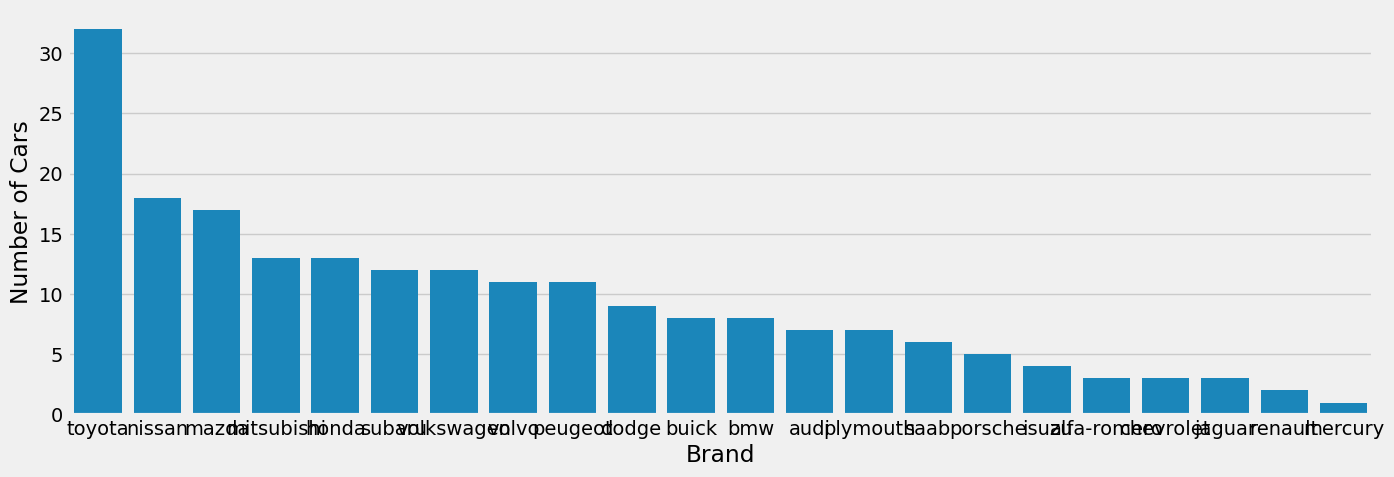

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
plt1=sns.countplot(x=df['brand'],order=pd.value_counts(df['brand']).index)
plt1.set(xlabel='Brand',ylabel='Number of Cars')
plt.show()
plt.tight_layout()


We can drop 'car_ID', 'symboling', and 'CarName' from our data frame, since they will no longer be needed.

In [ ]:
df.drop(['car_ID', 'symboling', 'CarName'],axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [ ]:
df.select_dtypes(include='object').columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'brand'],
      dtype='object')

In [ ]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

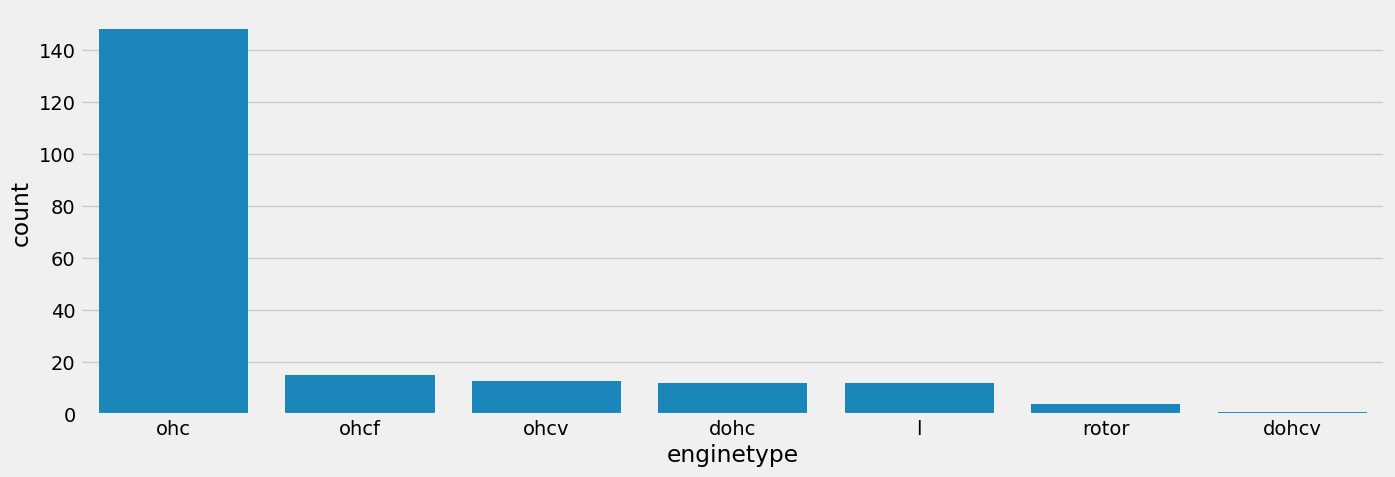

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='enginetype',data=df,order=pd.value_counts(df['enginetype']).index)
plt.show()

In [ ]:
df['enginelocation'].value_counts()

,count
enginelocation,
front,202
rear,3


Next, we need to engineer some features, for better visualizations and analysis. We will group our data by 'brand', calculate the average price for each brand, and split these prices into 3 bins: 'Budget', 'Mid-Range', and 'Luxury' cars, naming the newly created column - the 'brand_category'.

In [ ]:
data_comp_avg_price=df[['brand','price']].groupby('brand',as_index=False).mean().rename(columns={'price':"Avg_brand_price"})
# data_comp_avg_price = data[['brand','price']].groupby('brand', as_index = False).mean().rename(columns={'price':'brand_avg_price'})

In [ ]:
data=df.merge(data_comp_avg_price,on='brand')

We will now check the statistics of our average car price per car brand

In [ ]:
data.Avg_brand_price.describe()

,Avg_brand_price
count,205.000000
mean,13276.710571
std,7154.179185
min,6007.000000
25%,9239.769231
50%,10077.500000
75%,15489.090909
max,34600.000000


In [ ]:
data['brand_category']=data['Avg_brand_price'].apply (lambda x: "budget" if x<10000 else("mid-range" if 10000<=x<20000 else "luxury"))

In [ ]:
data['brand_category'].tail(50)


,brand_category
155,budget
156,budget
157,budget
158,budget
159,budget
160,budget
161,budget
162,budget
163,budget
164,budget


In [ ]:
data.select_dtypes(include=object).columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand',
       'brand_category'],
      dtype='object')

# **Exploratory Data Analysis**
List of Categorical Variables:

brand_category

fueltype

enginetype

carbody

doornumber

enginelocation

fuelsystem

cylindernumber

aspiration

drivewheel

We will use the boxplot() function on the above mentioned categorical variables, to display the mean, variance, and possible outliers, with respect to the price.

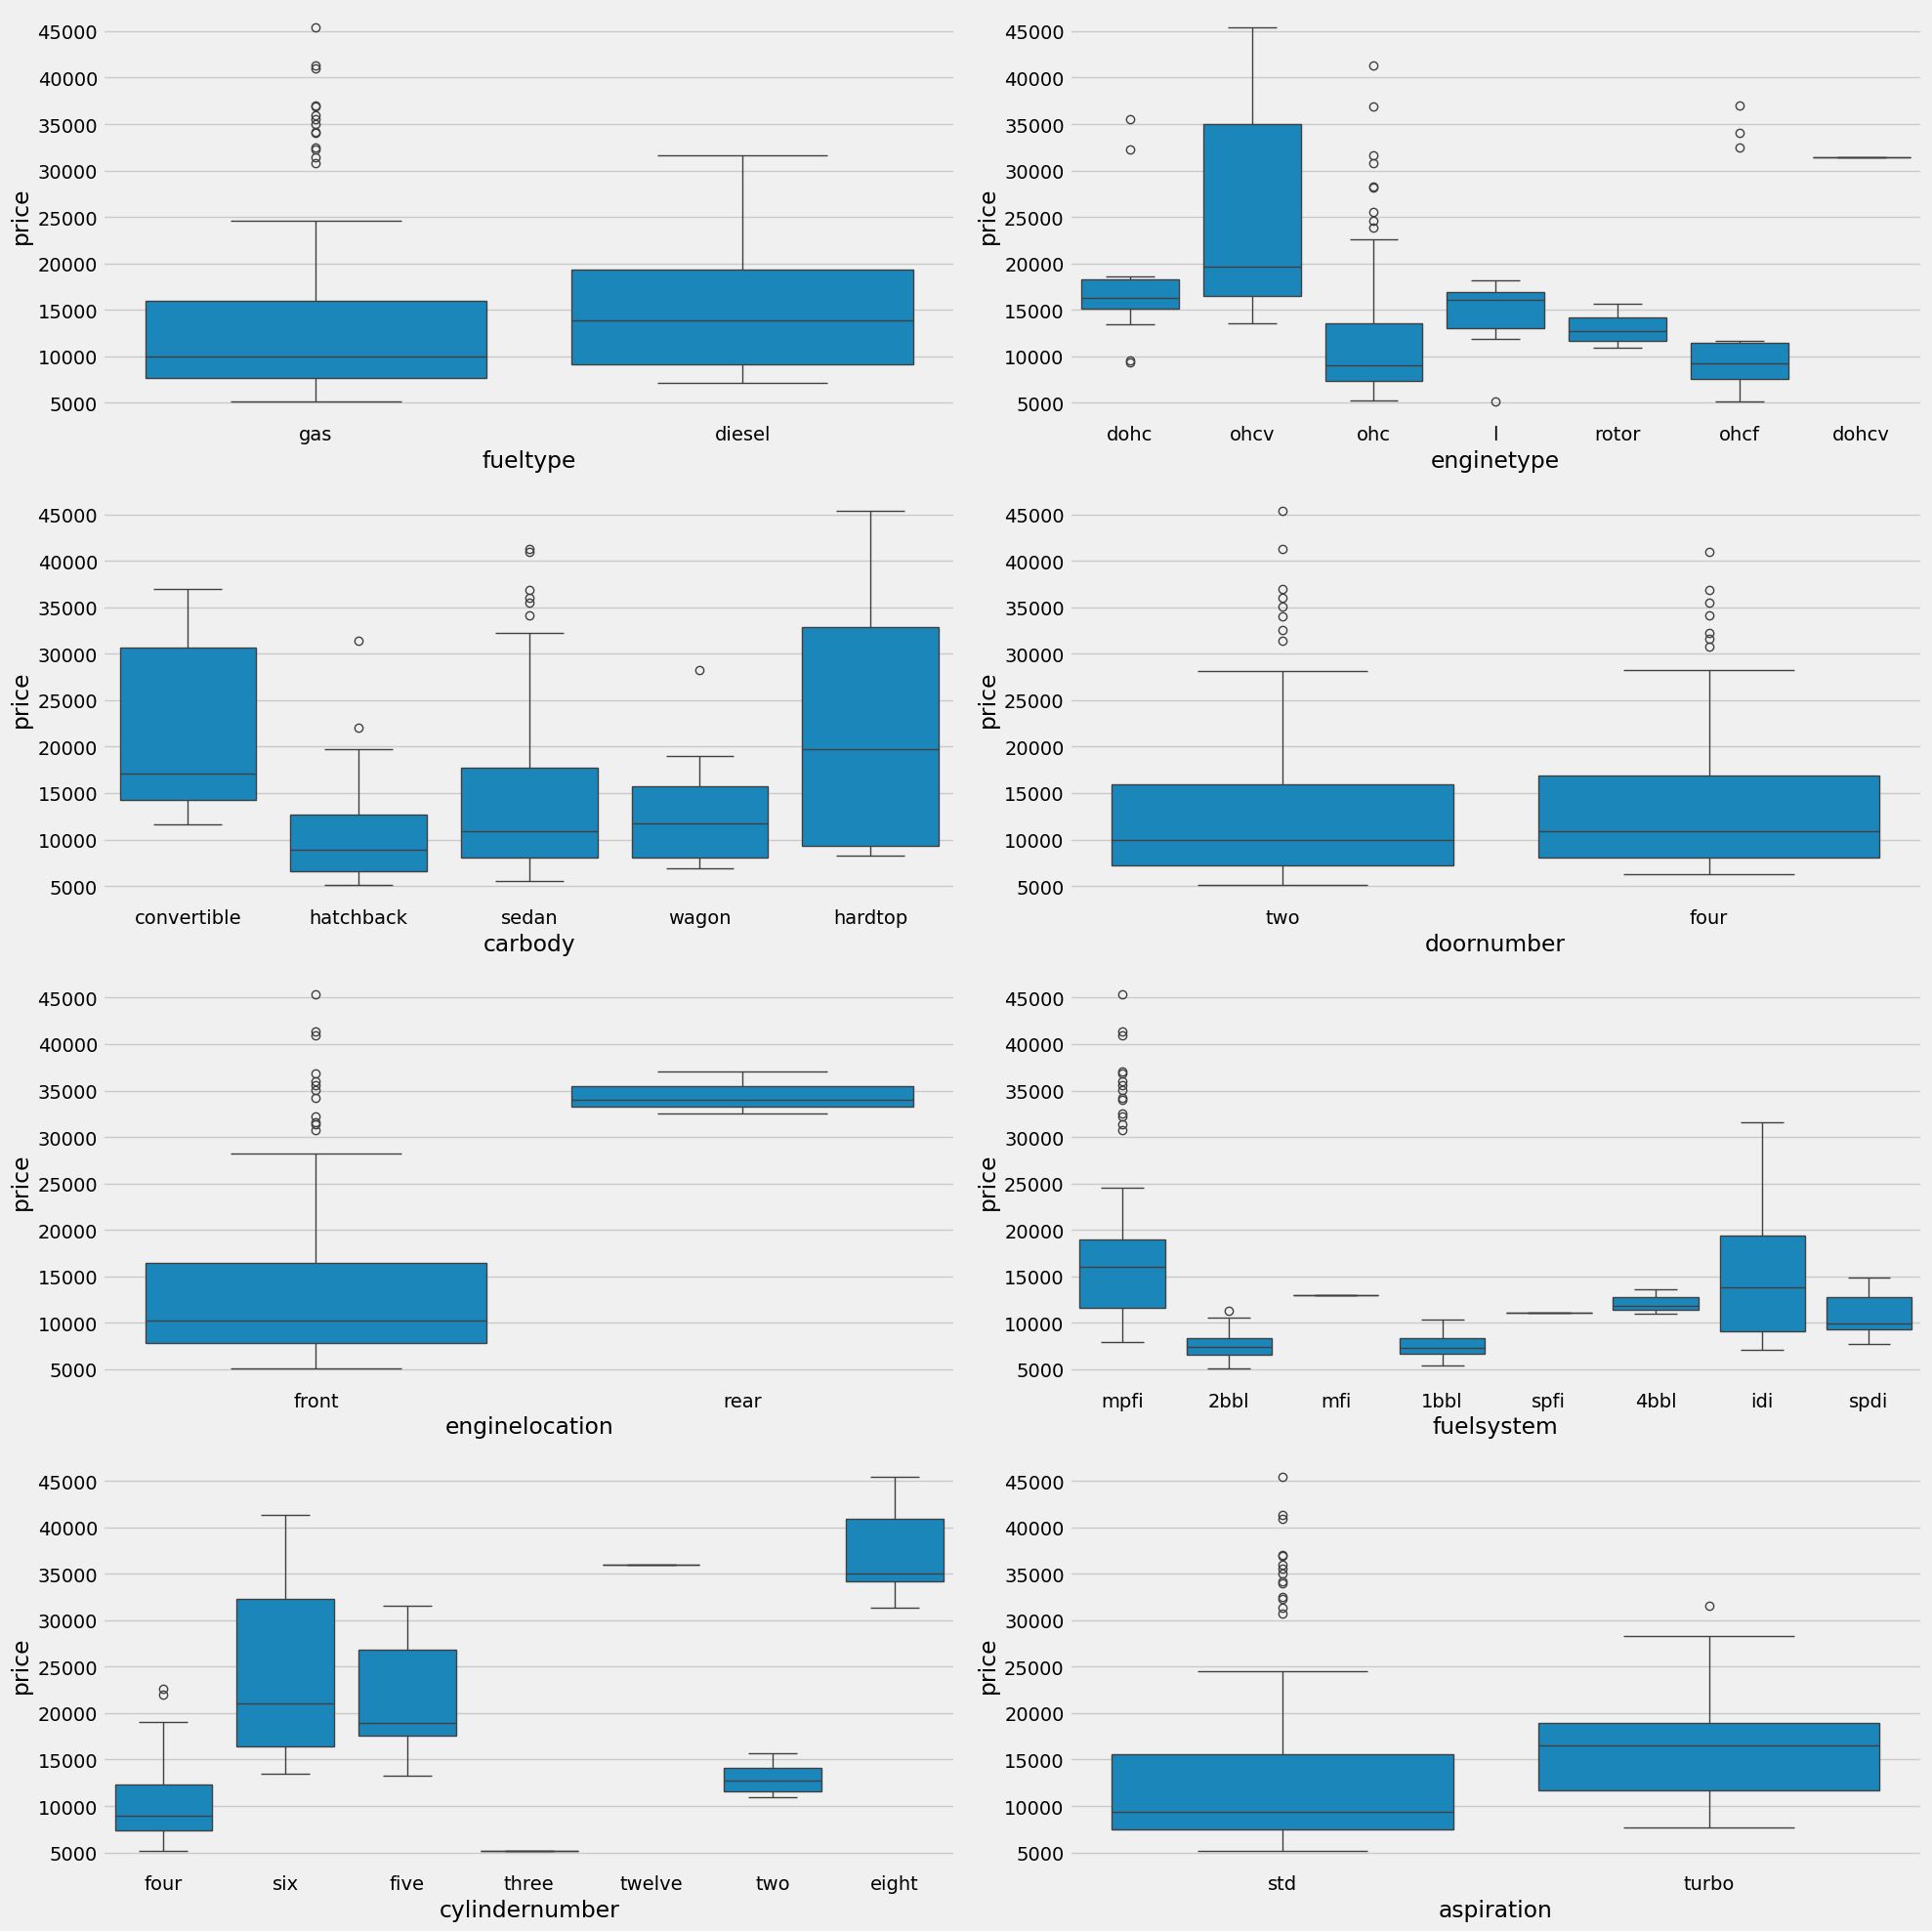

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'enginetype',y='price',data=data)
plt.subplot(4,2,3)
sns.boxplot(x= 'carbody',y='price',data=data)
plt.subplot(4,2,4)
sns.boxplot(x='doornumber',y='price',data=data)
plt.subplot(4,2,5)
sns.boxplot(x='enginelocation',y='price',data=data)
plt.subplot(4,2,6)
sns.boxplot(x='fuelsystem',y='price',data=data)
plt.subplot(4,2,7)
sns.boxplot(x='cylindernumber',y='price',data=data)
plt.subplot(4,2,8)
sns.boxplot(x='aspiration',y='price',data=data)
plt.tight_layout()
plt.show()

Next, let's view the list of top features that have high correlation coefficient. The corr() function calculates the Pearson's correlation coefficients with respect to the 'price'.

In [ ]:
corr_matrix=data.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending=False)

,price
price,1.000000
Avg_brand_price,0.895520
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336


Use the pairplot() function to display the scatter plots of the relationships between the features.

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

# **Testing Assumptions for Linear Regression**
Since we fit a linear model, we assume that the relationship between the target (price) and other features is linear.

We also expect that the errors, or residuals, are pure random fluctuations around the true line, in other words, the variability in the response (dependent) variable doesn't increase as the value of the predictor (independent) variable increases. This is the assumption of equal variance, also known as Homoscedasticity.

We also assume that the observations are independent of one another (no multicollinearity), and there is no correlation between the sequential observations.

If we see one of these assumptions in the dataset are not met, it's more likely that the other ones, mentioned above, will also be violated. Luckily, we can check and fix these assumptions with a few unique techniques.

Now, let's briefly touch upon each of these assumptions in our example.

# **1. Linearity Assumption**
Linear regression needs the relationship between independent variable and the dependent variable to be linear. We can test this assumption with some scatter plots and regression lines.

We will start with the 'enginesize' and 'horsepower' features.

<Axes: xlabel='horsepower', ylabel='price'>

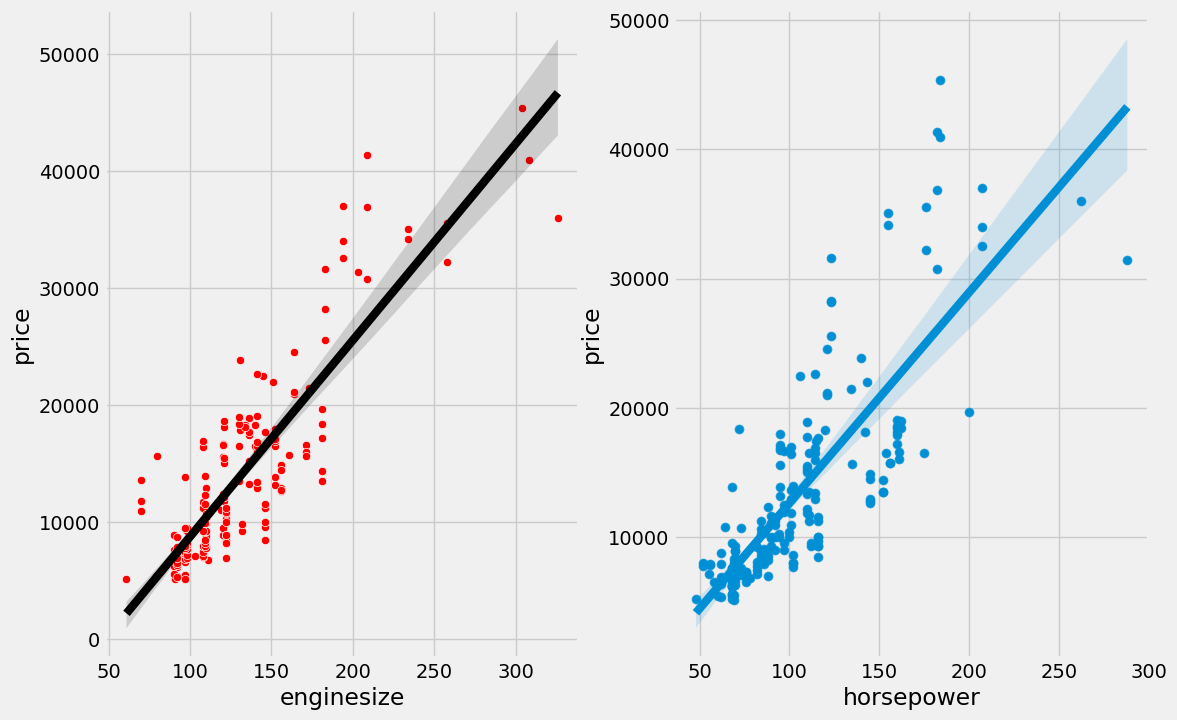

In [ ]:
fig,(ax1,ax2)=plt.subplots(figsize=(12,8),ncols=2,sharey=False)
sns.scatterplot( x= data['enginesize'],y=data['price'],color='red',ax=ax1)
sns.regplot(x=data['enginesize'],y=data['price'],ax=ax1,scatter=False,color='black')

sns.scatterplot(x=data['horsepower'],y=data['price'],ax=ax2)
sns.regplot(x=data['horsepower'],y=data['price'],ax=ax2)

In [ ]:
fig=plt.figure(figsize=(15,5))
sns.scatterplot(x=data['curbweight'],y=data['price'],color='red')
sns.regplot(x=data['curbweight'],y=data['price'],color='black',scatter=False)

# **2. Homoscedasticity**
The assumption of homoscedasticity (constant variance), is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable, we call it heteroscedasticity, opposite of homoscedasticity.

<Axes: xlabel='enginesize', ylabel='price'>

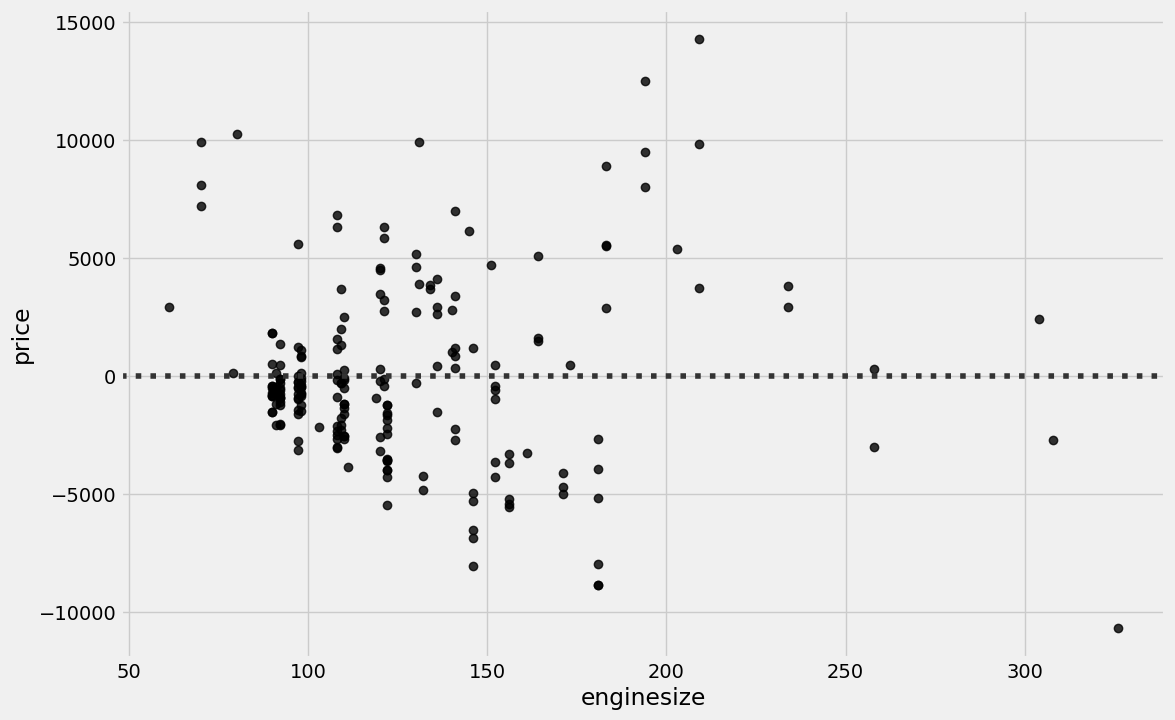

In [ ]:
plt.subplots(figsize=(12,8))
# sns.scatterplot(x=data['enginesize'],y=data['price'],color='red',label='Data')
sns.residplot(x=data['enginesize'],y=data['price'],data=data,lowess=False,color='black')

From the above plot, we can tell the error variance across the true line is dispersed somewhat not uniformly, but in a funnel like shape. So, the assumption of the homoscedasticity is more likely not met.

# **3. Normality¶**
The linear regression analysis requires the dependent variable, 'price', to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. This documentation contains more information on the normality assumption.

Let's display all three charts to show how our target variable, 'price' behaves.

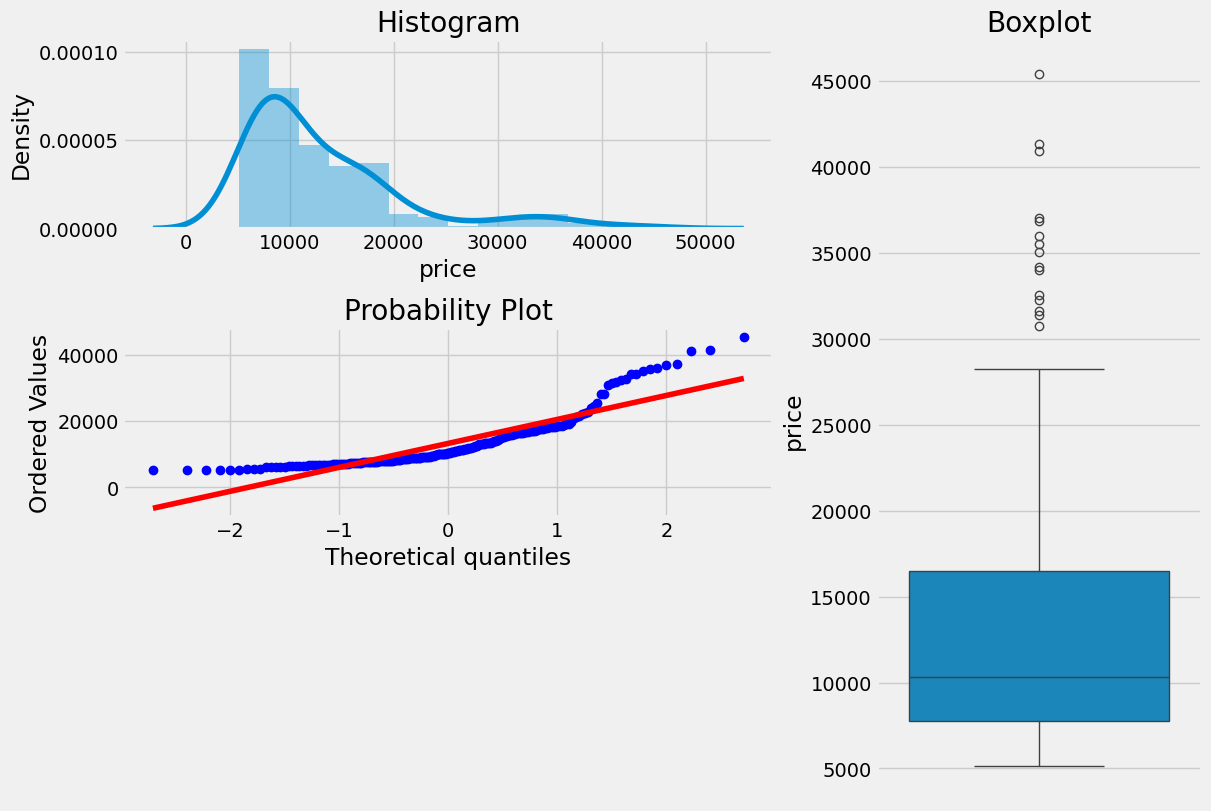

In [ ]:
def plotting_3_chart(data,feature):
  #import scipy,matplotlib,scipy modules
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.gridspec as gridspec
  from scipy import stats
  import matplotlib.style as style
  style.use('fivethirtyeight')
  #Creating a customized chart. and giving in figsize and everything.
  fig=plt.figure(constrained_layout=True,figsize=(12,8))
  #Creating A Grid of 3 columns and 3 rows
  grid=gridspec.GridSpec(ncols=3,nrows=3,figure=fig)
  #customiziing Hiistogram
  ax1=fig.add_subplot(grid[0,:2])
  #plot the histogram
  ax1.set_title('Histogram')
  sns.distplot(data.loc[:,feature],norm_hist=True,ax=ax1)

  #customizing QQ plot
  ax2=fig.add_subplot(grid[1,:2])
  #set the title
  ax2.set_title('QQ plot')
  stats.probplot(data.loc[:,feature],plot=ax2)
  #customizing boxplot
  ax3=fig.add_subplot(grid[:,2])
  ax3.set_title('Boxplot')
  # draw box plot
  sns.boxplot(data.loc[:,feature],orient='v',ax=ax3)

plotting_3_chart(data,'price')



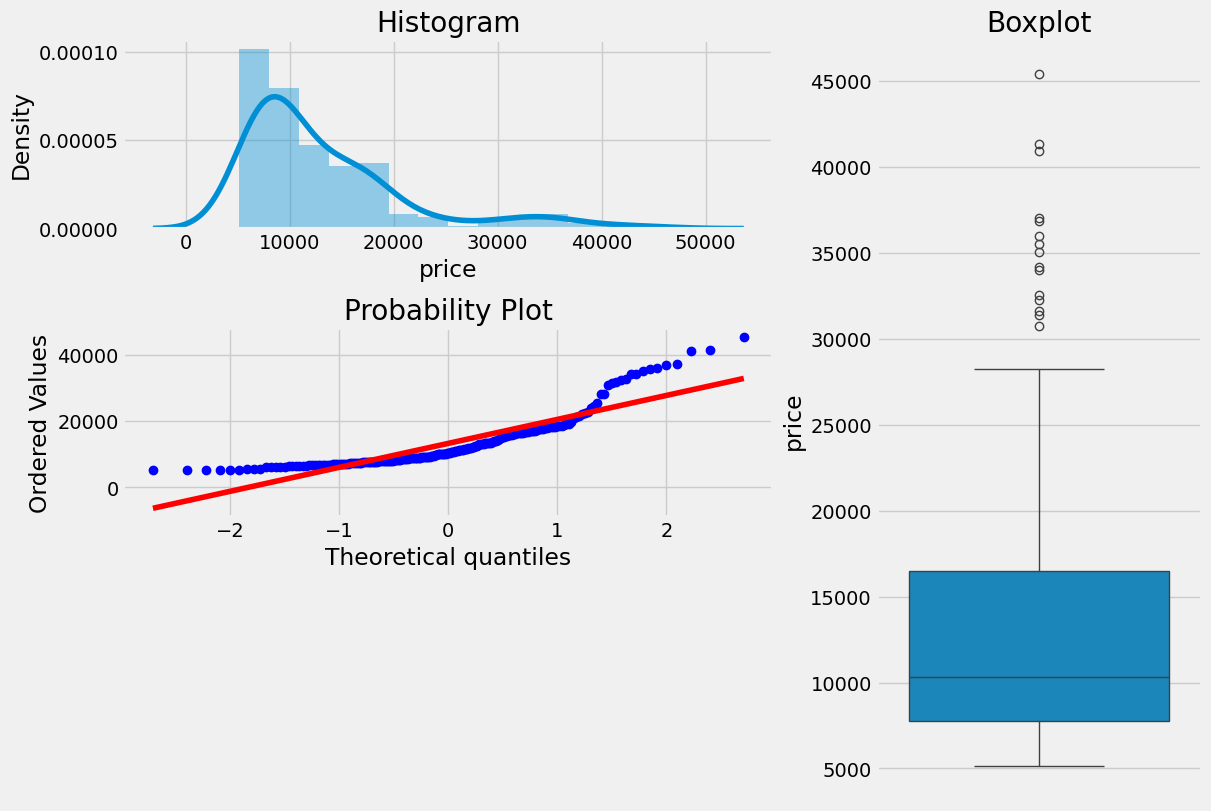

In [ ]:
def plotting_3_chart(data,feature):
  #import scipy,matplotlib,scipy modules
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.gridspec as gridspec
  from scipy import stats
  import matplotlib.style as style
  style.use('fivethirtyeight')
  #Creating a customized chart. and giving in figsize and everything.
  fig=plt.figure(constrained_layout=True,figsize=(12,8))
  #Creating A Grid of 3 columns and 3 rows
  grid=gridspec.GridSpec(ncols=3,nrows=3,figure=fig)
  #customiziing Hiistogram
  ax1=fig.add_subplot(grid[0,:2])
  #plot the histogram
  ax1.set_title('Histogram')
  sns.distplot(data.loc[:,feature],norm_hist=True,ax=ax1)

  #customizing QQ plot
  ax2=fig.add_subplot(grid[1,:2])
  #set the title
  ax2.set_title('QQ plot')
  stats.probplot(data.loc[:,feature],plot=ax2)
  #customizing boxplot
  ax3=fig.add_subplot(grid[:,2])
  ax3.set_title('Boxplot')
  # draw box plot
  sns.boxplot(data.loc[:,feature],orient='v',ax=ax3)


plotting_3_chart(data,'price')

These three charts above can tell us a lot about our target variable:

Our target variable, 'price' is not normally distributed
Our target variable is right-skewed
There are some outliers in the variable
The right-skewed plot means that most prices in the dataset are on the lower end (below 15,000). The 'max' value is very far from the '75%' quantile statistic. All these plots show that the assumption for accurate linear regression modeling is not met.

Next, we will perform the log transformation to correct our target variable and to make it more normally distributed.

But first, we will save our data that we have changed so far, in the 'previous_data' frame.

In [ ]:
previous_data=data.copy()


# **Log Transformation**
We can also check statistically if the target is normally distributed, using normaltest() function. If the p-value is large (>0.05), the target variable is normally distributed.

In [ ]:
normaltest(data.price.values)

NormaltestResult(statistic=np.float64(77.37514013383584), pvalue=np.float64(1.578344501676757e-17))

As we can see, the p-value is very small, so it is not normally distributed.

Now, we can try to transform our data, so it looks more normally distributed. We can use the np.log() or np.log1pfunctions from the numpy library to perform the log transformation. The np.log1p works better with smaller numbers and thus provides more accurate results.

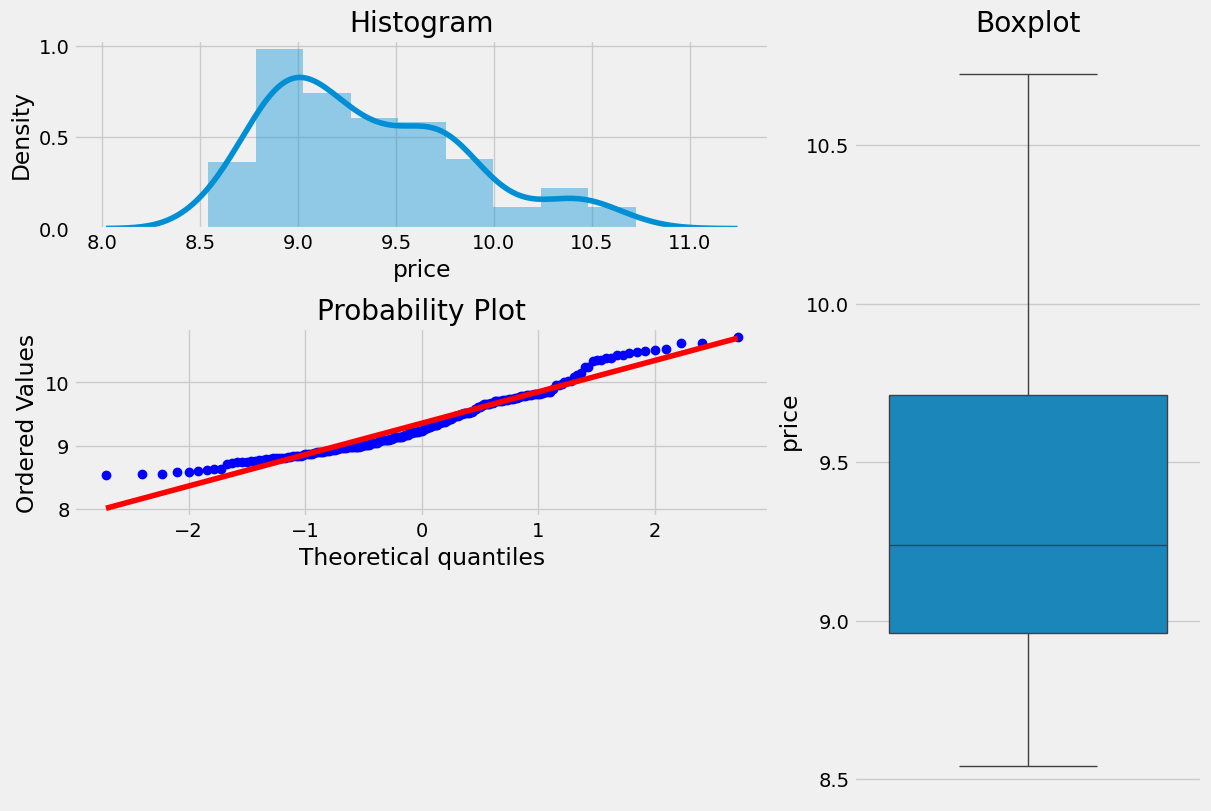

In [ ]:
data['price']=np.log(data['price'])
plotting_3_chart(data,'price')

In [ ]:
# Let's check our p-value, after the transformation.
normaltest(data.price.values)


NormaltestResult(statistic=np.float64(14.10341345775947), pvalue=np.float64(0.0008659297880185564))

As we can see, the log method transformed the car 'price' distribution into a more symmetrical bell curve. It is still not perfect, but it is much closer to being normally distributed.

There are other ways to correct the skewed data. For example, Square Root Transform (np.sqrt) and the Box-Cox Transform (stats.boxcox from the scipy stats library)..

NormaltestResult(statistic=np.float64(16.727141852202635), pvalue=np.float64(0.00023321006918393855))


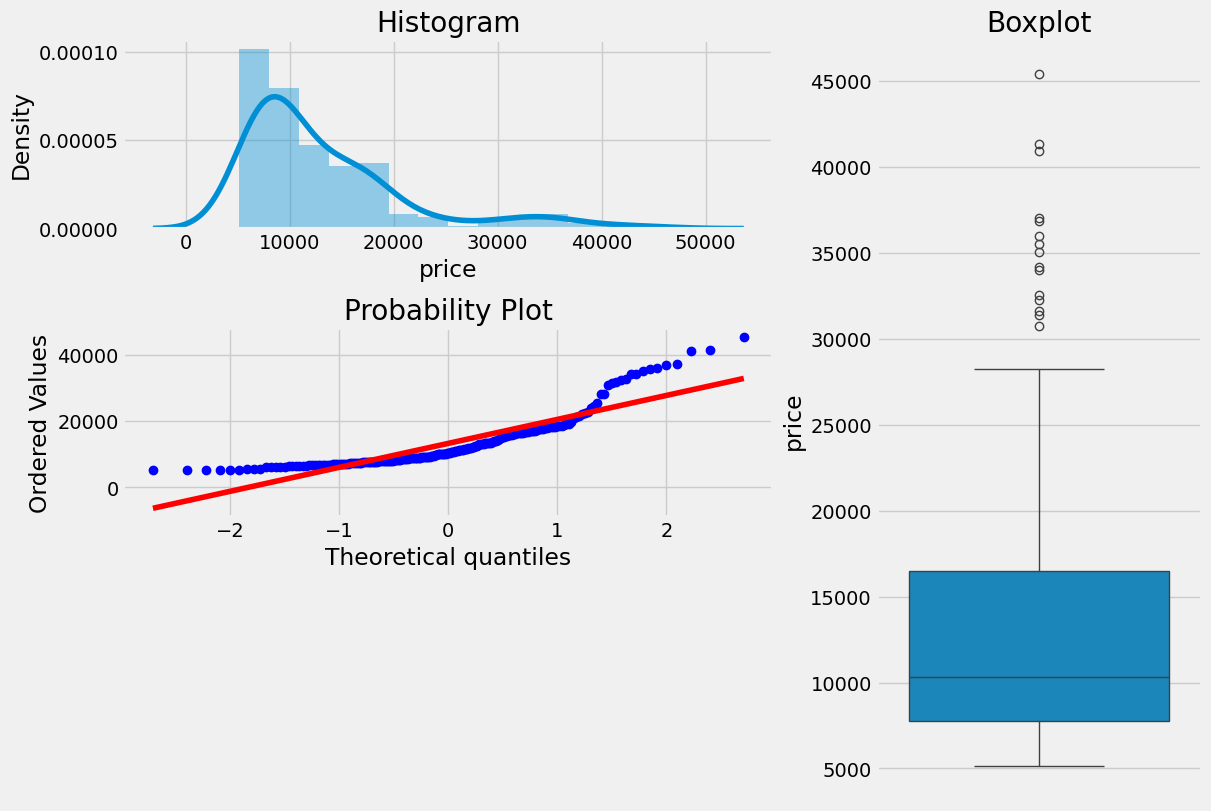

In [ ]:
# Use the boxcox() function to do another transformation on the original,
# untransformed data (previous_data). Use the normaltest() function to check for statistics.
cp_result=boxcox(previous_data['price'])
boxcox_price=cp_result[0]
print(normaltest(boxcox_price))
plotting_3_chart(previous_data,'price')

### 4. *Multicollinearity

*Multicollinearity* is when there is a strong correlation between the independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. *Multicollinearity* can lead to a variety of problems, including:

*   The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
*   Predictors can have widely different results depending on the observations in our sample, and small changes in samples can   result in very different estimated effects.
*   With very high multicollinearity, the inverse matrix, the computer calculations may not be accurate.
*   We can no longer interpret a coefficient on a variable because there is no scenario in which one variable can change without a conditional change in another variable.

Using `heatmap()` function is an excellent way to identify whether there is *multicollinearity* present or not. **bold text**

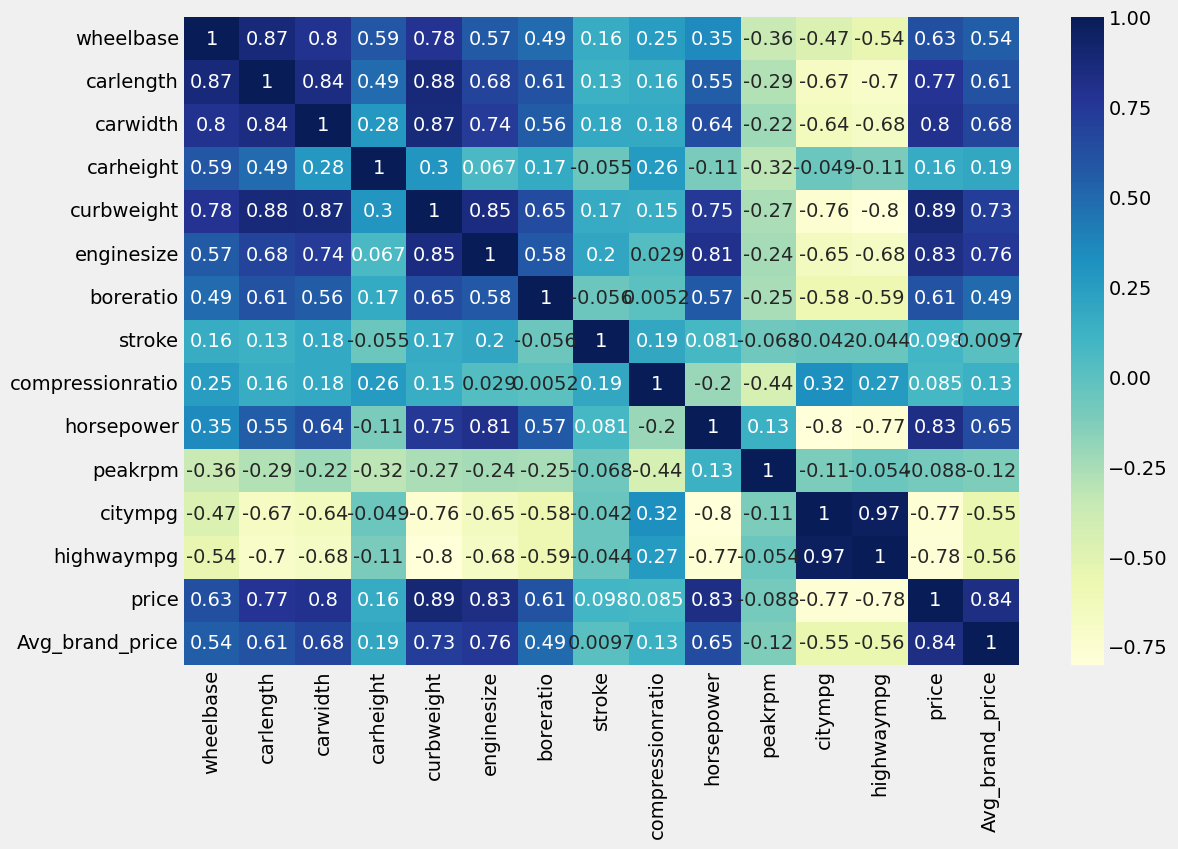

In [ ]:
numeric_data=data.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

Observation.
As we can see, the multicollinearity still exists in various features.  we would solve it later

# **Linear Regression Model**
List of significant variables after Exploratory Data Analysis :

# **Numerical:**

Curbweight

Car Length

Car width

Engine Size

Boreratio

Horse Power

Wheel base

City mpg (miles per gallon)

Highway mpg (miles per gallon)

# **Categorical:**

Engine Type

Fuel type

Car Body

Aspiration

Cylinder Number

Drivewheel

Brand Category

We are going to put all the selected features into a data frame.

In [ ]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']

selected=data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


We can find the categorical columns by iterating through the dtypes attribute.

In [ ]:
categorical_columns=[col for col in selected.columns if selected[col].dtype=='object']
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

In [ ]:
numeric_columns=list(set(columns)-set(categorical_columns))
numeric_columns

['carlength',
 'price',
 'carwidth',
 'wheelbase',
 'boreratio',
 'citympg',
 'highwaympg',
 'enginesize',
 'curbweight',
 'horsepower']

We can split the data into the features X and target y.

In [ ]:
x=selected.drop('price',axis=1)
x.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,gas,std,convertible,rwd,88.6,mid-range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,gas,std,convertible,rwd,88.6,mid-range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,gas,std,hatchback,rwd,94.5,mid-range,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,gas,std,sedan,fwd,99.8,mid-range,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,gas,std,sedan,4wd,99.4,mid-range,2824,ohc,five,136,3.19,115,176.6,66.4,18,22


In [ ]:
y=selected['price'].copy()
y.head()

,price
0,9.510075
1,9.711116
2,9.711116
3,9.543235
4,9.767095


Before we used one-hot encoding to deal with the categorical data, let's examine the distribution of the categorical variables:

In [ ]:
for column in categorical_columns:
  print("column Name : ", column)
  print("Value_count")
  print(selected[column].value_counts())

column Name :  fueltype
Value_count
fueltype
gas       185
diesel     20
Name: count, dtype: int64
column Name :  aspiration
Value_count
aspiration
std      168
turbo     37
Name: count, dtype: int64
column Name :  carbody
Value_count
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
column Name :  drivewheel
Value_count
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
column Name :  brand_category
Value_count
brand_category
budget       95
mid-range    86
luxury       24
Name: count, dtype: int64
column Name :  enginetype
Value_count
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
column Name :  cylindernumber
Value_count
cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64


We see many categorical features have few or one occurrence. For example, we see three, twelve only occur once in the column cylindernumber. Therefore, if the components for the one-hot encoding are constructed using the training data, and the sample in the column cylindernumber does not include three or twelve, we will get an error. As a result, we must split the data before the transformation. This is fine as one-hot encoding is a deterministic transform, but for other transforms, for example standardization, the parameters should be estimated using the training data, then applied to the test data.

# **ONE HOT ENCODER**

In [ ]:
# We will use the following modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


To perform one-hot encoding, we use the ColumnTransformer class, this allows different columns or column subsets to be transformed separately.

The input is as follows:

The transformerslist is the number of tuples. The list of (name, transformer, columns) tuples specify the transformer objects to be applied to the subsets of the data.

name: name of the operation that can be used later

transformer: estimator must support fit and transform,
 in this case we will use OneHotEncoder()

‘drop’: to drop the columns

‘passthrough’: to pass them through untransformed data

remainder: specifies the columns that are not transformed are being set to passthrough. They are combined in the output, and the non-specified columns are dropped.

We apply fit_transform() to transform the data.

In [ ]:
one_hot=ColumnTransformer(transformers=[('One_hot',OneHotEncoder(),categorical_columns)], remainder='passthrough')
x=one_hot.fit_transform(x)
print(type(x))


ValueError: Specifying the columns using strings is only supported for dataframes.

# **Feature Scaling Practice**

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
df=fetch_california_housing()
df1=pd.DataFrame(df.data,columns=df.feature_names)
y=df.target
df1.head()
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=0.2,random_state=42)
x_train.shape

(16512, 8)

In [ ]:
x_test.shape

(4128, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
import numpy as np
np.round(x_train_scaled.describe(),1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0
mean,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-2.2,-1.9,-1.8,-1.3,-0.2,-1.4,-2.4
25%,-0.7,-0.8,-0.4,-0.2,-0.6,-0.1,-0.8,-1.1
50%,-0.2,0.0,-0.1,-0.1,-0.2,-0.0,-0.6,0.5
75%,0.5,0.7,0.3,0.0,0.3,0.0,1.0,0.8
max,5.8,1.9,57.2,56.6,30.1,107.1,3.0,2.6


In [ ]:
np.round(x_train.describe(),1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0
mean,3.9,28.6,5.4,1.1,1426.5,3.1,35.6,-119.6
std,1.9,12.6,2.4,0.4,1137.1,11.6,2.1,2.0
min,0.5,1.0,0.9,0.3,3.0,0.7,32.6,-124.4
25%,2.6,18.0,4.5,1.0,789.0,2.4,33.9,-121.8
50%,3.5,29.0,5.2,1.0,1167.0,2.8,34.3,-118.5
75%,4.8,37.0,6.1,1.1,1726.0,3.3,37.7,-118.0
max,15.0,52.0,141.9,25.6,35682.0,1243.3,42.0,-114.3


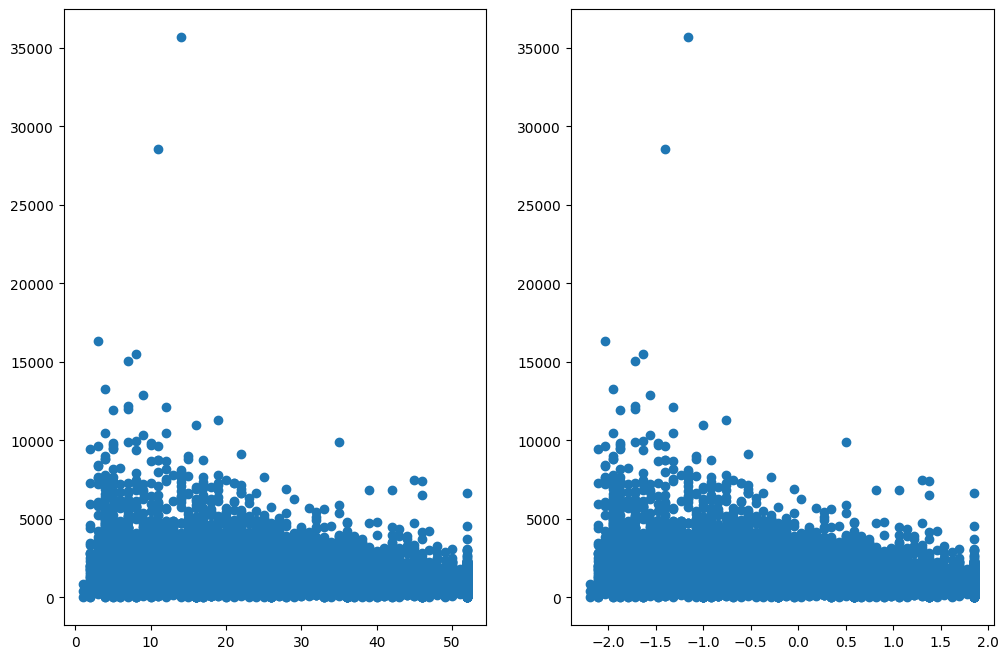

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(figsize=(12,8),ncols=2)
ax1.scatter(x_train['HouseAge'],x_train['Population'])
ax2.scatter(x_train_scaled['HouseAge'],x_train['Population'])

<Axes: xlabel='HouseAge', ylabel='Density'>

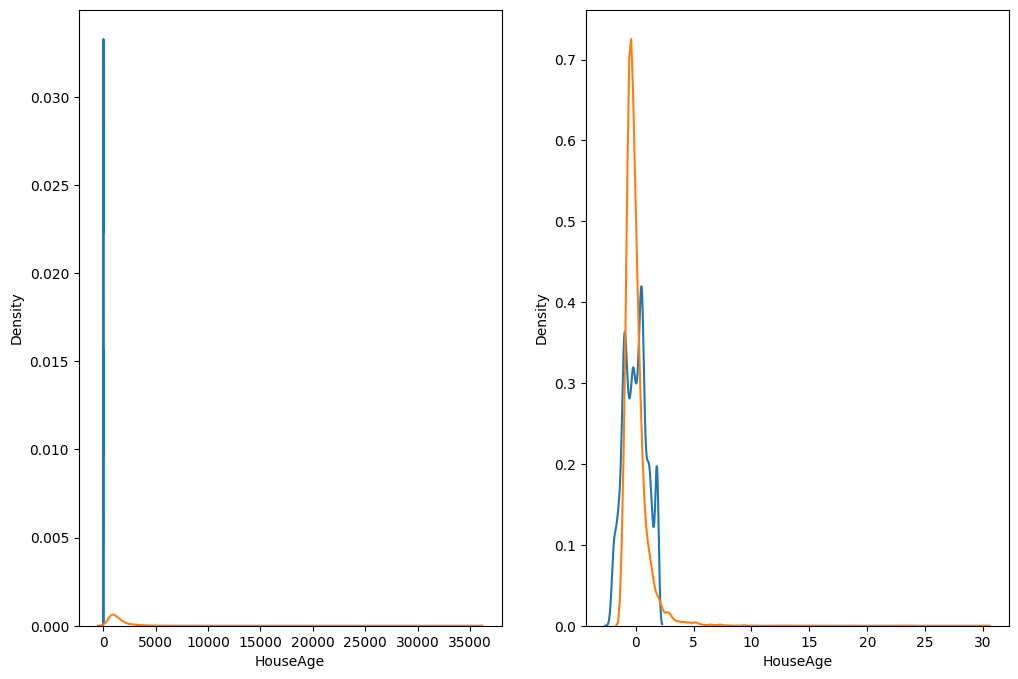

In [ ]:
import seaborn as sns
fig,(ax1,ax2)=plt.subplots(figsize=(12,8),ncols=2)
sns.kdeplot(x_train['HouseAge'],ax=ax1)
sns.kdeplot(x_train['Population'],ax=ax1)
sns.kdeplot(x_train_scaled['HouseAge'],ax=ax2)
sns.kdeplot(x_train_scaled['Population'],ax=ax2)